In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 2.0 MB/s 
     |████████████████████████████████| 6.8 MB 51.5 MB/s 
     |████████████████████████████████| 981 kB 26.9 MB/s 
     |████████████████████████████████| 263 kB 46.2 MB/s 
     |████████████████████████████████| 2.8 MB 42.6 MB/s 
     |████████████████████████████████| 1.2 MB 53.2 MB/s 
     |████████████████████████████████| 468 kB 48.8 MB/s 
     |████████████████████████████████| 895 kB 34.7 MB/s 
     |████████████████████████████████| 3.3 MB 49.8 MB/s 
     |████████████████████████████████| 61 kB 458 kB/s 
     |████████████████████████████████| 596 kB 34.7 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=daee918b07f91d23306b00548d40014b7a76a5df98609a912b19bb496ef3ac2f
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=4beb886f1d8029c3

In [ ]:
!git clone https://github.com/alihamzaaawan/Game_Prediction_BERT.git


Cloning into 'Game_Prediction_BERT'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
data_train = pd.read_excel('/content/Game_Prediction_BERT/final_train.xlsx',dtype= str)
data_train


,Plot,Review
0,"A Vietnam veteran, who has recently returned h...",neg
1,"John, an unattached plumber, meets and falls i...",neg
2,Play the action at your fingertips with 52 gam...,neg
3,You get a selection of four trucks and five st...,neg
4,"Just another mission, or so you thought, until...",neg
...,...,...
1061,A frozen island. A blood-red moon. An ancient ...,pos
1062,When an evil chairman's moneymaking scheme put...,pos
1063,"In 2401, humanity is at war with relentless al...",pos
1064,Armed with a camera capable of fighting ghosts...,pos


In [ ]:
data_test = pd.read_excel('/content/Game_Prediction_BERT/final_test.xlsx',dtype= str)
data_test

,Plot,Review
0,A new installment to the NBA video game series...,neg
1,Can your bird survive through a thousand poles?,neg
2,Grand Theft Auto: The Trilogy - The Definitive...,neg
3,Call of Duty: Black Ops Declassified covers th...,neg
4,A Dr. Seuss book about a cheeky cat that talks...,neg
...,...,...
451,"A diplomatic, strategic war game set between t...",pos
452,Four years after the events of StarCraft: Broo...,pos
453,A squirrel rages through the end of its dying ...,pos
454,Gordon Freeman and Alyx Vance must escape City...,pos


In [ ]:
(x_train, y_train), (x_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                                                                     text_column = 'Plot',
                                                                     label_columns = 'Review',
                                                                     val_df = data_test,
                                                                     maxlen = 400,
                                                                     preprocess_mode = 'bert')

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name='bert',
                             train_data = (x_train, y_train),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
x_train[0].shape

(1066, 400)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 400)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 400)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 400, 768),  23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 400, 768)     1536        ['Input-Segment[0][0]']    

In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = (x_train, y_train),
                             val_data = (x_test, y_test),
                             batch_size = 6)

In [ ]:
#learner1 = learner.lr_find()

In [ ]:
#learner.lr_plot()

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs= 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
178/178 [==============================] - 5252s 29s/step - loss: 0.6493 - accuracy: 0.6266 - val_loss: 0.5665 - val_accuracy: 0.6864
Epoch 2/5
178/178 [==============================] - 5250s 30s/step - loss: 0.5237 - accuracy: 0.7523 - val_loss: 0.4598 - val_accuracy: 0.7961
Epoch 3/5
178/178 [==============================] - 5285s 30s/step - loss: 0.3278 - accuracy: 0.8705 - val_loss: 0.4275 - val_accuracy: 0.8289
Epoch 4/5
178/178 [==============================] - 5295s 30s/step - loss: 0.0863 - accuracy: 0.9709 - val_loss: 0.4841 - val_accuracy: 0.8421
Epoch 5/5
178/178 [==============================] - 5286s 30s/step - loss: 0.0232 - accuracy: 0.9972 - val_loss: 0.5004 - val_accuracy: 0.8399


In [ ]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [ ]:
learner.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 400)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 400)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 400, 768),  23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 400, 768)     1536        ['Input-Segment[0][0]']    

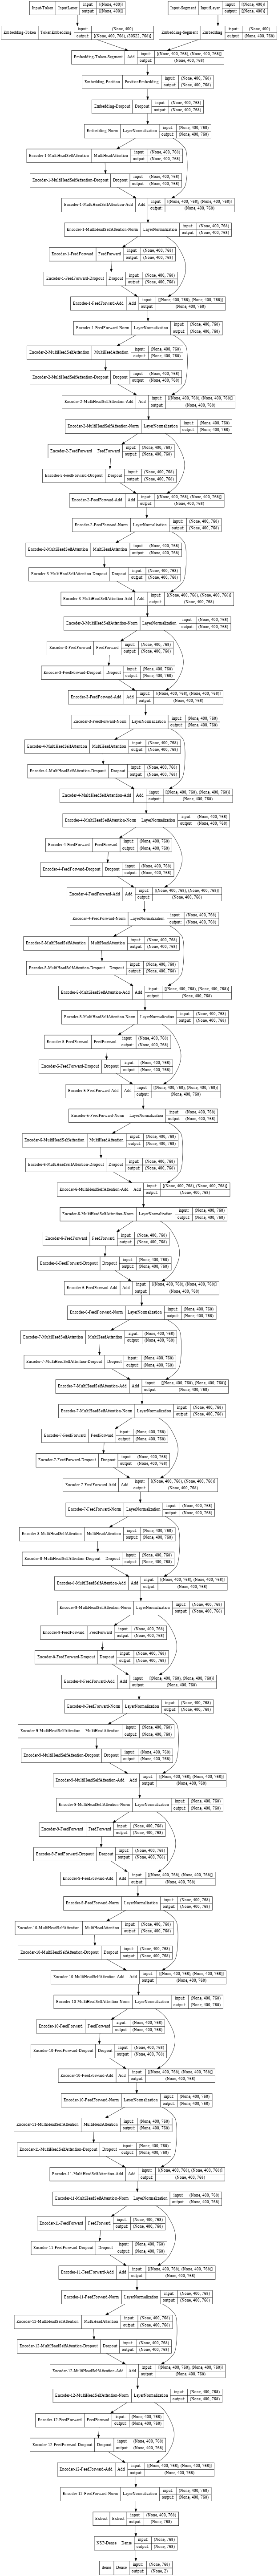

In [ ]:
tf.keras.utils.plot_model(learner.model, show_shapes=True, dpi=48)

In [ ]:
data = ['Betrayed by the evil deity that he served in life (and death), Caleb rises from the grave seeking vengeance and answers.'
,'Eight fighters from around the world compete to get the chance to take on the evil dictator M. Bison. Choose a character and engage your opponents in one-on-one close quarter street combat in a series of best-two-out-of-three matches.'
,'Medal of Honor: Allied Assault drops you into World War II as American Lieutenant Mike Powell. Using anything at your disposal, you will fight your way from Arzew to Omaha Beach, and then straight into the heart of the Third Reich.'
,'The first 3D Superman game. Your friends Lois Lane, Jimmy Olsen and Professor Emil Hamilton are trapped in the virtual reality machine by Lex Luthor. Superman must fly through hoops in the city, solve maze puzzles and fight villains.'
,'In a modern retelling of Arkanoid, Sometimes You brings us the next stage in brick breaking titles.'
,'A Doom style shooter where you play as a soldier from the future and must shoot your way through hordes of killer cyborgs.']

In [ ]:
predictor.predict(data)

['pos', 'neg', 'pos', 'neg', 'neg', 'neg']

In [ ]:
predictor.save('/content/FinalBert')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
predictor.save('/content/FinalBert')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
